# 가설 검정
- 패키지 Import

In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   # FutureWarning 제거

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

***[Scipy 패키지]***
- 확률분포 클래스
  - 이산확률분포
    - bernoulli() : 베르누이분포
    - binom() : 이항분포
    - multinomial() : 다항분포
  
  - 연속확률분포
    - uniform() : 균일분포
    - norm() : 정규분포
    - beta() : 베타분포
    - gamma() : 감마분포
    - t() : 스튜던트 t분포
    - chi2() : 카이제곱 분포
    - f() : f분포
    - dirichlet() : 디리클리 분포
    - multivariate_normal() : 다변수 정규분포
---
- 확률분포 메서드
  - pmf : 확률질량함수 ( Probability Mass Function )
  - pdf : 확률밀도함수 ( Probability Density Function )
  - cdf : 누적분포함수 ( Cumulative Distribution Function )
  - ppf : 누적분포함수의 역함수 ( Inverse Cumulative Distribution Function )
  - sf : 생존함수 ( Survival Function) = (1 - 누적분포함수)
  - isf : 생존함수의 역함수 ( Inverse Survival Function )
  - rvs : 랜덤 표본 생성 ( Random Variable Sampling )

## 검정 통계량
### 모분산을 알고 있는 경우의 가설 검정 = Z검정 ( 단일 표본 )
- Scipy패키지의 확률분포 클래스 stats.norm() 사용
- 사례) 사람의 평균 수명을 알아보기 위해 사망자 100명을 표본으로 추출하여 조사하였더니 평균 71.798년으로 나타났다. 모표준편차를 8.9년으로 가정할 때, 현재의 평균 수명은 70년보다 길다고 할 수 있는가를 검정하라 ( 유의수준 $a$ = 0.05 )

#### 가설 설정
- 귀무가설 $H_0 : \mu$ = 70년
- 대립가설 $H_1 : \mu$ > 70년 ( 우측 검정 )
- 유의수준 $a$=0.05

#### 기각값(임계값)

In [2]:
# 기각값
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


#### 검정 통계량 ( z통계량 )

In [3]:
# 변이 분석
n = 100
m_u = 70
m_sigma = 8.9
hysis_u = 71.798

# 검정 통계량 계산
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n))
print(z)

## print(2 * stats.norm().sf(np.sbs(z))) # 유의확률

2.0202247191011256


#### 분포도 작성 및 통계적 결론
- 임계값 1.64 < z통계량 2.02, z통계량은 기각역에 속함

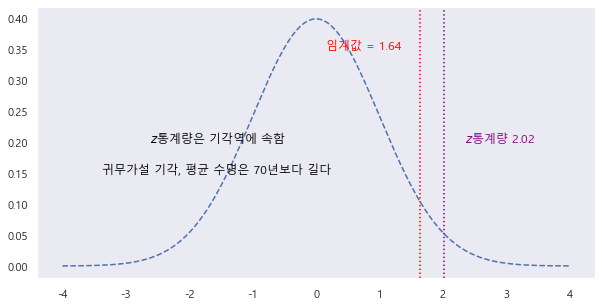

In [11]:
# 시각화

xx = np.linspace(-4, 4, 1000)
black = {'facecolor':'black'}
plt.figure(figsize=(10, 5))

pdf_norm = stats.norm.pdf(xx)

plt.plot(xx, pdf_norm, 'b--')

# 95%의 임계값 표시
plt.axvline(x=z_95, color='red', linestyle=':')
plt.text(0.75, .35, '임계값 = ' + str(round(z_95, 2)),
         horizontalalignment = 'center', color='red')

# 위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x=z, color='purple', linestyle=':')
plt.text(2.9, .2, '$z$통계량 ' + str(round(z, 2)),
         horizontalalignment = 'center', color='purple')
plt.text(-1.5, .2, '$z$통계량은 기각역에 속함  ',
         horizontalalignment = 'center', color='black')
plt.text(-1.5, .15, '귀무가설 기각, 평균 수명은 70년보다 길다  ',
         horizontalalignment = 'center', color='black')
plt.grid()
plt.show()

### 모분산을 모르고 $n$<30인 경우의 모평균의 가설 검정
- Scipy 패키지의 확률분포 클래스 stats.t() 사용
- 사례) A편의점의 매운 라면의 연평균 판매량 46개였다고 한다. 12곳의 매장을 표본추출하여 매운 라면의 판매량을 조사하였더니 표본평균이 42, 표본표준편차가 11.9로 나타났다. 라면 판매량의 모집단은 정규모집단으로 가정했을 때 연평균판매량이 46개보다 적은지 검정하라. ( 유의수준 $a$=0.05 )
#### 가설 설정
- 귀무가설 $H_0 : \mu$ = 46
- 대립가설 $H_1 : \mu$ > 46년 ( 좌측 검정 )
- 유의수준 $a$=0.05

#### 기각값

In [12]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값 , df : 자유도
t_95 = -1 * stats.t.ppf(0.95, df=n-1)   #  좌측검정 * -1

print(t_95)

-1.7958848187036691


#### 검정 통계량 ( t통계량 )

In [13]:
# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.1644039042479846


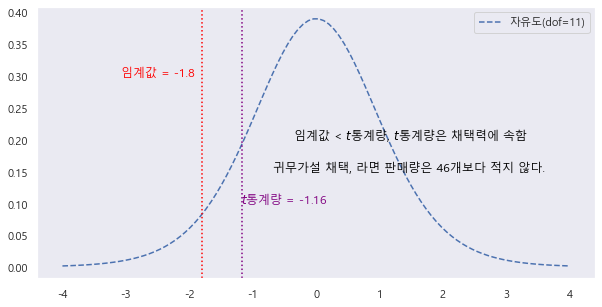

In [18]:
# 시각화
t_data = np.linspace(-4, 4, 100)
t_dist = stats.t(df=n-1)

black = {'facecolor':'black'}
plt.figure(figsize=(10,5))
plt.plot(t_data, t_dist.pdf(t_data), 'b--', label=("자유도(dof=11)"))

# 95%의 임계값 표시
plt.axvline(x=t_95, color='red', linestyle=':')
plt.text(-2.5, .3, f'임계값 = {str(round(t_95, 2))}',
         horizontalalignment = 'center', color = 'red')

# 위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x=t_value, color='purple', linestyle = ':')
plt.text(-0.5, .1, f'$t$통계량 = {str(round(t_value, 2))}',
         horizontalalignment = 'center', color = 'purple')
plt.text(1.5, .2, '임계값 < $t$통계량, $t$통계량은 채택력에 속함 ',
         horizontalalignment = 'center', color = 'black')
plt.text(1.5, .15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다. ',
         horizontalalignment = 'center', color = 'black')
plt.grid()
plt.legend()
plt.show()

- p-value ( 유의확률 )
  - 유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail) 부분에 해당하는 영역의 면적
  - 귀무가설이 맞음에도 불구하고 현재 검정 통계량값과 같은 혹은 대립가설을 더 옹호하는 검정 통계량값이 나올 확률
  
- 모분산을 모르고 $n$<30인 경우의 모평균의 가설 검정의 사례 정리
  - 통계량 $t$ = -1.1644039042479846
  - 95% 좌측검정 기각값 : -1.7958848187036691
  - 자유도 df : 12 - 1

In [19]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값(유의수준:5%), df : 자유도
t_95 = round(-1*stats.t.ppf(0.95, df=n-1), 3)  # 좌측검정 * -1

print(f'기각값 : {t_95}')

# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(f't통계량 : {round(t_value, 3)}')

기각값 : -1.796
t통계량 : -1.164


In [20]:
# p_value(유의확률) 계산
round(stats.t(df=11).cdf(t_value), 3)

0.134

Text(-3, 0.25, '검정 통계량 t = -1.164(유의확률 0.13)')

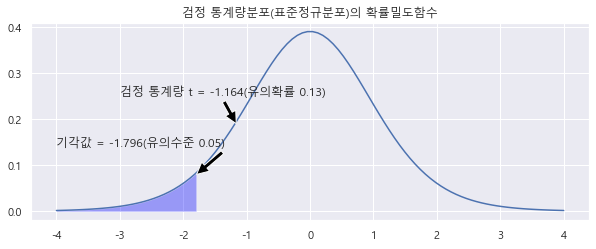

In [21]:
## 시각화

norm_rv = stats.t(df=11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.title('검정 통계량분포(표준정규분포)의 확률밀도함수')
black = {'facecolor':'black'}

# 기각값 text
plt.annotate('기각값 = -1.796(유의수준 0.05)', xy=(-1.79, 0.08), xytext=(-4, 0.14),
             arrowprops=black)

# 기각값 면적
xx2 = np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue', alpha=0.35)

# P-value ( 유의확률 ) test
plt.annotate('검정 통계량 t = -1.164(유의확률 0.13)', xy=(-1.164, 0.19), xytext=(-3, 0.25),
             arrowprops=black)

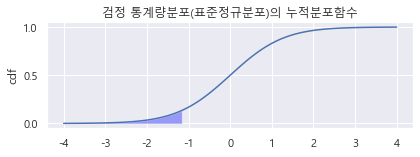

In [22]:
# P-value(유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor='red', alpha=0.35)

plt.text(1, .15, '$(a = 0.05) < (P-Value = 0.134)$',
         horizontalalignment = 'center', color = 'red')
plt.text(1, .10, '$P$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다',
         horizontalalignment = 'center', color = 'red')
plt.text(1, .05, '결론 : 라면 판매량은 46개보다 적지 않다.',
         horizontalalignment = 'center', color = 'red')

# 누적분포도
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue', alpha=0.35)
plt.ylabel('cdf')
plt.title('검정 통계량분포(표준정규분포)의 누적분포함수')

plt.tight_layout()
plt.show()